<a href="https://colab.research.google.com/github/Ngocnguyen11906/DATA-SCIENCE-212/blob/main/D%E1%BB%B0_%C4%90O%C3%81N_GIAO_D%E1%BB%8ACH_T%C3%8DN_D%E1%BB%A4NG_GIAN_L%E1%BA%ACN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GIAN LẬN THẺ TÍNH DỤNG**

Phát hiện gian lận tính dụng dựa trên các thuộc tính cuả tập dữ liệu với 3 mô hình khác nhau.

Bởi vì số giao dịch gian lận không bằng số giao dịch không gian lận trong tập dữ liệu, có hai phương pháp giúp cải thiện điều này:

- Thêm một số nhiễu (gaussian) vào dữ liệu gian lận để tạo ra nhiều hơn và giảm sự mất cân bằng
- Lấy mẫu ngẫu nhiên dữ liệu gian lận và đào tạo k mô hình và tính trung bình chúng ra (hoặc chọn tốt nhất)[văn bản liên kết](https://)

In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,8962,-1.313182,2.433905,-0.899347,1.089808,-0.303673,-0.792225,-0.176378,1.025209,0.446011,...,0.091606,0.561427,0.222199,0.052202,-0.592092,-0.412069,0.273770,0.154929,2.99,0.0
1,19257,1.111948,0.066912,0.679877,0.808805,-0.614613,-0.752595,-0.156202,-0.088680,1.253134,...,-0.328980,-0.915522,0.134636,0.435182,0.074005,0.025208,-0.077190,0.010020,49.99,0.0
2,710,1.408027,-0.331867,-0.313791,-0.849112,-0.361621,-0.863772,-0.076457,-0.283323,-1.494481,...,0.234797,0.584994,-0.235836,0.072392,0.826615,-0.085643,-0.030822,-0.008092,25.00,0.0
3,27708,-0.874989,-0.140030,1.501768,-1.649674,-0.036426,-1.503874,0.238906,-0.068661,-1.343836,...,-0.253053,-1.108494,0.134367,0.303829,0.359547,-0.704640,0.150611,0.043762,39.70,0.0
4,1720,1.328181,0.005283,-0.091712,0.149795,-0.303337,-0.926846,0.122930,-0.211222,0.398993,...,-0.122759,-0.241423,-0.117649,0.106396,0.566983,1.115290,-0.099590,-0.012845,2.00,0.0


In [4]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 81 fraud data points and 17836 nonfraudulent data points.


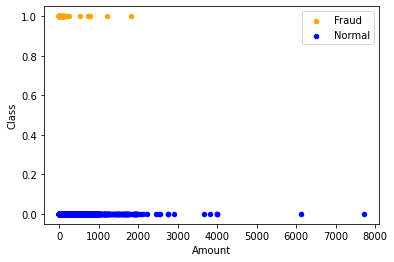

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [5]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

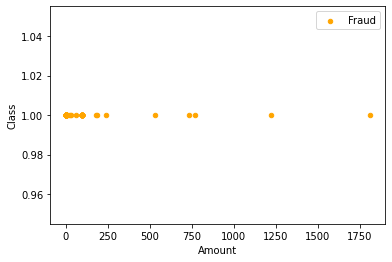

In [6]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

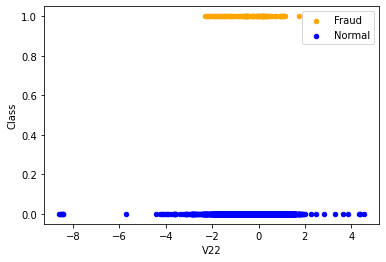

This feature may not be very important because of the similar distribution.


In [7]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

LOGISTIC REGRESSION

In [8]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [14]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=500)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 17918 17918
Train and test sizes, respectively: 11646 11646 | 6272 6272
Total number of frauds: 81 0.0045205938162741375
Number of frauds on y_test: 43 0.006855867346938775
Number of frauds on y_train: 38 0.003262922891980079


In [13]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

ValueError: ignored